# **Combinatorial Chemical Substructures** 
This combinatorial tutorial was created by Hathaichanok Chuntakaruk, Bioinformatics and Computational Biology, Chulalongkorn University, Thailand

Edited in 13/03/2023


## Mount google colab to google drive ###

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install "RDKit" library 
RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python.

Ref: https://www.rdkit.org/ and https://colab.research.google.com/drive/1MAZyv3O4-TrI8c1MD4JVmwExDquaprRT?usp=sharing

In [6]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 27.7 MB/s eta 0:00:00


## Install Open Babel 
Open Babel is a chemical toolbox designed to speak the many languages of chemical data.

Ref: https://openbabel.org/docs/dev/Installation/install.html and Asst.Prof. Kowit Hengphasatporn, Center for Computational Sciences, University of Tsukuba

In [7]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

--2023-03-13 10:02:33--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2023-03-13 10:02:33--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  70.96M   121MB/s    in 0.6s    

2023-03-13 10:02:34 (121 MB/s) - ‘Miniconda3-latest-Linux

In [8]:
!conda install -q -y -c conda-forge openbabel zlib --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openbabel
    - zlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    cairo-1.16.0               |       hb05425b_3         1.2 MB
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-23.1.0               |  py310hff52083_0         918 KB  conda-forge
    fontconfig-2.14.1          |       hef1e5e3_0         284 KB
    freetype-2.12.1            |       hca18f0e_1         611 KB  conda-forge
    glib-2.69.1                |       he621ea3_2         1.9 MB
    icu-70.1                   |       h27

## Install py3Dmol 
A simple [IPython/Jupyter](http://jupyter.org/) widget to embed an interactive [3Dmol.js](http://3dmol.org) viewer in a notebook.

Ref: https://pypi.org/project/py3Dmol/

In [9]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached py3Dmol-2.0.1.post1-py2.py3-none-any.whl (12 kB)


## Clone the GitHub Repository
The git clone command is used to create a copy of a specific repository or branch within a repository.
Ref: https://github.com/git-guides/git-clone

In [10]:
!git clone https://github.com/fahhathai/Tutorial_CombinatorialSubstructures.git

Cloning into 'Tutorial_CombinatorialSubstructures'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), 175.01 KiB | 1.30 MiB/s, done.


## Convert mol files to smiles format 
Convert mol files of DRV and one modified moiety of analogs to smiles format using Open Babel

In [11]:
!mkdir /content/Tutorial_CombinatorialSubstructures/smiles_dir

In [12]:
cmp_name = ["DRV", "cmp_diffP1", "cmp_diffP1p", "cmp_diffP2", "cmp_diffP2p"]
cmp_path = "/content/Tutorial_CombinatorialSubstructures/"
smiles_path = "/content/Tutorial_CombinatorialSubstructures/smiles_dir/"
mol_format = ".mol"
smiles_format = ".smi"

for i in cmp_name:
  !obabel -imol $cmp_path$i$mol_format -osmi -O $smiles_path$i$smiles_format -p 7.4 --ff GAFF

1 molecule converted
20 molecules converted
20 molecules converted
20 molecules converted
20 molecules converted


## Collect smiles format to list 
Collect each smiles format of DRV and one modified moiety of analogs to csv pattern for converting to list form using RDKit

In [13]:
import pandas as pd
import re
import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PandasTools import LoadSDF
IPythonConsole.ipython_useSVG=True

In [14]:
for j in cmp_name:
  path = smiles_path + j + smiles_format
  print("Set of " + j)
  with open(path, 'r') as f:
    content = f.read()
    print(content)

Set of DRV
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	0-0-0-0

Set of cmp_diffP1
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(=O)[O-])[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	1-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1c2c([nH]c1)cccc2)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	2-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)c1ccncc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	3-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cnc(c2)C(C)C)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	4-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cncc2)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	5-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(C)C)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	6-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)[C@H]([C@H](O)O)C)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	7-0-0-0
C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)[C@H](C)C(=O)[O-])[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1	8-0-0-0
C1O[C@H]2OCC[C@H

In [15]:
DRV_smiles = []
P1_smiles = []
P1p_smiles = []
P2_smiles = []
P2p_smiles = []

list_cmp = [DRV_smiles, P1_smiles, P1p_smiles, P2_smiles, P2p_smiles]

cnt = 0
for k in cmp_name:
  path = smiles_path + k + smiles_format
  with open(path, 'r') as infile:
      data = infile.readlines()
      for l in data:
          each_smi = l.split()          
          list_cmp[cnt].append(each_smi[0])
  cnt = cnt + 1          

In [47]:
print(DRV_smiles[0:3])
print(P1_smiles[0:3])
print(P1p_smiles[0:3])
print(P2_smiles[0:3])
print(P2p_smiles[0:3])

['C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1']
['C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(=O)[O-])[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1c2c([nH]c1)cccc2)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)c1ccncc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1']
['C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CCc1ccccc1)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(Cc1cc(c(cc1)Cl)Cl)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CCCCc1ccccc1)S(=O)(=O)c1ccc(N)cc1']
['C1O[C@H]2O[C@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1)C(=O)[O-]', 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1)C(=O)[O-]', 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1)C(C)C']
[

## Structure figure 
># F1 ---- core1 ---- F2 ---- core2 ---- F3 ---- core3 ---- F4 -------------- extra F1
>#  P2 ------------------- P1 ------------------ P1' ------------------ P2'-------------- extra P2

## Define core structures 

In [17]:
core1 = 'OC(=O)N[C@@H]'
core2 = '[C@H](O)CN'
core3 = 'S(=O)(=O)'

## Create lists to collect fragments: F1, F2, F3, and F4 ###
Note: F1 = P2, F2 = P1, F3 = P1', F4 = P2' 

In [18]:
lst_F1 = [] #P2
lst_F2 = [] #P1
lst_F3 = [] #P1'
lst_F4 = [] #P2'

## Collect fragments
>1. DRV --> split all cores (collect 0-0-0-0)

In [19]:
DRV_split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]|\\[C@H\\]\\(O\\)CN|S\\(=O\\)\\(=O\\)",DRV_smiles[0]) # split core ('N(CC(O)C', 'NC(=O)', 'S(=O)(=O)')
DRV_split_lst = list(filter(None, DRV_split_lst)) 
print(DRV_split_lst)

## Collect each fragment in lists
for i in range(len(DRV_split_lst)):
  eval("lst_F"+str(i+1)).append(DRV_split_lst[i])

['C1O[C@H]2OCC[C@H]2[C@H]1', '(Cc1ccccc1)', '(CC(C)C)', 'c1ccc(N)cc1']


In [20]:
print(lst_F1)
print(lst_F2)
print(lst_F3)
print(lst_F4)

['C1O[C@H]2OCC[C@H]2[C@H]1']
['(Cc1ccccc1)']
['(CC(C)C)']
['c1ccc(N)cc1']


>2. Collect F2 (P1) --> split core1 and 2 (collect X-0-0-0)

>>Note: collect members at index 1 of split list

In [21]:
for i in P1_smiles:
  split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]|\\[C@H\\]\\(O\\)CN",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F2.append(split_lst[1])

In [22]:
#DRV + F2
print(lst_F2)

['(Cc1ccccc1)', '(Cc1cc(ccc1)C(=O)[O-])', '(Cc1c2c([nH]c1)cccc2)', '(Cc1ccc(cc1)c1ccncc1)', '(Cc1ccc2c(c1)cnc(c2)C(C)C)', '(Cc1ccc2c(c1)cncc2)', '(Cc1cc(ccc1)C(C)C)', '(Cc1ccc(cc1)[C@H]([C@H](O)O)C)', '(Cc1ccc(cc1)[C@H](C)C(=O)[O-])', '(Cc1ccncc1)', '(Cc1ccc(cc1)CO)', '(Cc1ccc(cc1)CCl)', '(Cc1cc2c(cc1)OCO2)', '(Cc1cc2c(cc1)NCC2)', '(Cc1cc(ccc1)[C@@H](c1ccc[nH]1)[NH3+])', '(Cc1cc(ccc1)[C@H](c1ccc[nH]1)[NH3+])', '(Cc1cc(ccc1)c1ccc[nH]1)', '(Cc1c(cccc1)C(=O)[O-])', '(Cc1c(cccc1)CO)', '(Cc1ccc(cc1)O)', '(Cc1cc(c(cc1)C(=O)[O-])C)']


>3. Collect F3 (P1') --> split core2 and 3 (collect 0-X-0-0)
   
>>Note: collect members at index 1 of split list

In [23]:
for i in P1p_smiles:
  split_lst = re.split("\\[C@H\\]\\(O\\)CN|S\\(=O\\)\\(=O\\)",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F3.append(split_lst[1])

In [24]:
#DRV + F3
print(lst_F3)

['(CC(C)C)', '(CCc1ccccc1)', '(Cc1cc(c(cc1)Cl)Cl)', '(CCCCc1ccccc1)', '(C/C=C/C)', '(CCc1cc(c(cc1)Cl)Cl)', '(CCCC)', '(CCc1ccc(cc1)Cl)', '(', '(CCC(=O)OCC)', '(CCCCC1=CC=CC1)', '(CCOCC)', '(CC[NH+]1CCOCC1)', '(CCCCC(=O)[O-])', '(Cc1ccc(cc1)Cl)', '(', '(C[C@@H](C)[NH3+])', '(C[C@@H](C)[NH3+])', '(CCC(=O)[O-])', '(C(C)C)', '(CCc1cccnc1)']


4. Collect F1 (P2) --> use a special core to split: 

            Special core: 'OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1' 

   Note: 
         - In some cases of splitting F1, there are two separated fragments therefore the special core is needed.
         - The core are all sequences except F1 and extra F1 (core 1 + F2 + core 2 + F3 + core 3 + F4). 
         - Collect 0-0-X-0
         - Collect all members in split list


In [25]:
for i in P2_smiles:
  split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]\\(Cc1ccccc1\\)\\[C@H\\]\\(O\\)CN\\(CC\\(C\\)C\\)S\\(=O\\)\\(=O\\)c1ccc\\(N\\)cc1",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  # print(split_lst)
  lst_F1.append(split_lst)

In [26]:
#DRV + F1
lst_F1[0] = ['C1O[C@H]2OCC[C@H]2[C@H]1'] #change string F1 of DRV to list
print(lst_F1) #lst_F1[i[2]]

[['C1O[C@H]2OCC[C@H]2[C@H]1'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')C(=O)[O-]'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')C(=O)[O-]'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')C(C)C'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')C(C)C'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')NO'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')NO'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')CC'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')CC'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')[NH3+]'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')[NH3+]'], ['C1O[C@H]2O[C@H](C[C@H]2[C@H]1', ')C[NH3+]'], ['C1O[C@H]2O[C@@H](C[C@H]2[C@H]1', ')C[NH3+]'], ['C1O[C@H]2OC[C@H]([C@H]2[C@H]1', ')[NH3+]'], ['C1O[C@H]2OC[C@@H]([C@H]2[C@H]1', ')[NH3+]'], ['[C@H]1(O[C@H]2OCC[C@H]2[C@H]1', ')N=C(C)C'], ['[C@H]1(O[C@H]2OCC[C@H]2[C@H]1', ')N=C(C)C'], ['[C@H]1(O[C@H]2OCC[C@H]2[C@H]1', ')C=C(C)C'], ['[C@H]1(O[C@H]2OCC[C@H]2[C@H]1', ')C=C(C)C'], ['C1O[C@H]2ONC[C@H]2[C@H]1'], ['C1O[C@H]2OC[NH2+][C@H]2[C@H]1']]


>5. Collect F4 (P2') --> split core3 (collect 0-0-0-X)

   >>Note: collect members at index 1 of split list

In [27]:
for i in P2p_smiles:
  split_lst = re.split("S\\(=O\\)\\(=O\\)",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F4.append(split_lst[1])

In [28]:
#DRV + F4
print(lst_F4)

['c1ccc(N)cc1', 'c1ccc(N)c(c1)C(C)C', 'c1ccc(cc1)C[NH3+]', 'c1cccc(c1)C(=O)[O-]', 'c1ccc(cc1)Cl', 'c1c(cc(cc1C)C)C', 'c1ccc(cc1)C', 'c1cn(nc1)C', 'c1ccc(cc1)CC', 'c1ccc(cc1)OC', 'c1ccc(c(c1)Cl)Cl', 'c1ccc(cc1)F', 'c1ccc(cc1)Br', 'c1ccccc1', 'c1ccc(c(c1)N)Cl', 'c1ccc(cc1)C(F)(F)F', 'c1ccc(cc1)OC(F)(F)F', 'c1ccc(cc1)[C@@H](O)C', 'c1ccc(cc1)C(C)C', 'c1ccc(cc1)OC(C)C', 'c1c2cccc(c2ccc1)N(C)C']


## Create index lists according to each fragment

In [29]:
P1_index = [i for i in range(len(lst_F2))]
P1p_index = [i for i in range(len(lst_F3))]
P2_index = [i for i in range(len(lst_F1))]
P2p_index = [i for i in range(len(lst_F4))]

#Select some fragments following id
#For instance
# P1_index = [0,4,9,10,12,19]
# P1p_index = [0,5,8,13,20]
# P2_index = [0,2,3,9,10,12,13,14,19]
# P2p_index = [0,3,10,19]

In [30]:
print(P1_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## Combination of all possible index

In [31]:
import itertools # Permutation
all_index = [P1_index, P1p_index, P2_index, P2p_index]
permute_all_index = list(itertools.product(*all_index))

In [32]:
permute_all_index[0:150000:8000] #Sampling some members of the list to show

[(0, 0, 0, 0),
 (0, 18, 2, 20),
 (1, 15, 5, 19),
 (2, 12, 8, 18),
 (3, 9, 11, 17),
 (4, 6, 14, 16),
 (5, 3, 17, 15),
 (6, 0, 20, 14),
 (6, 19, 2, 13),
 (7, 16, 5, 12),
 (8, 13, 8, 11),
 (9, 10, 11, 10),
 (10, 7, 14, 9),
 (11, 4, 17, 8),
 (12, 1, 20, 7),
 (12, 20, 2, 6),
 (13, 17, 5, 5),
 (14, 14, 8, 4),
 (15, 11, 11, 3)]

## Use permuted index to select combined fragments

>Adding string according to this equation: P2 + core1 + P1 + core2 + P1' + core3 + P2'

In [33]:
permute_smile_lst = []

for i in permute_all_index:
  #First merge core1 + P1 + core2 + P1' + core3 + P2'
  all_part_except_F1 = core1 + lst_F2[i[0]] + core2 + lst_F3[i[1]] + core3 + lst_F4[i[3]]
  if len(lst_F1[i[2]]) > 1: #Indicating F1 having extra fragment 
    all_part = lst_F1[i[2]][0] + all_part_except_F1 + lst_F1[i[2]][1]
  else: #F1 has no extra fragment
    all_part = lst_F1[i[2]][0] + all_part_except_F1 
  permute_smile_lst.append(all_part)

In [34]:
permute_smile_lst[0:150000:8000] #Sampling some members of the list to show

['C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1',
 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CCC(=O)[O-])S(=O)(=O)c1c2cccc(c2ccc1)N(C)C)C(=O)[O-]',
 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(=O)[O-])[C@H](O)CN(S(=O)(=O)c1ccc(cc1)OC(C)C)NO',
 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1c2c([nH]c1)cccc2)[C@H](O)CN(CC[NH+]1CCOCC1)S(=O)(=O)c1ccc(cc1)C(C)C)CC',
 'C1O[C@H]2O[C@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)c1ccncc1)[C@H](O)CN(CCC(=O)OCC)S(=O)(=O)c1ccc(cc1)[C@@H](O)C)C[NH3+]',
 'C1O[C@H]2OC[C@@H]([C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cnc(c2)C(C)C)[C@H](O)CN(CCCC)S(=O)(=O)c1ccc(cc1)OC(F)(F)F)[NH3+]',
 '[C@H]1(O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cncc2)[C@H](O)CN(CCCCc1ccccc1)S(=O)(=O)c1ccc(cc1)C(F)(F)F)C=C(C)C',
 'C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(C)C)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(c(c1)N)Cl',
 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(C)C)[C@H](O)C

## Create id list based on permute_all_index

In [35]:
id_lst = []

for i in permute_all_index:
  str_index = str(i[0]) + '-' + str(i[1]) + '-' + str(i[2]) + '-' + str(i[3])
  id_lst.append(str_index)

In [48]:
print(id_lst[0:150000:8000])

['0-0-0-0', '0-18-2-20', '1-15-5-19', '2-12-8-18', '3-9-11-17', '4-6-14-16', '5-3-17-15', '6-0-20-14', '6-19-2-13', '7-16-5-12', '8-13-8-11', '9-10-11-10', '10-7-14-9', '11-4-17-8', '12-1-20-7', '12-20-2-6', '13-17-5-5', '14-14-8-4', '15-11-11-3']


## Create a dictionary which keys are id and values are combined smile files

In [37]:
smile_dict = {id_lst[i]:permute_smile_lst[i] for i in range(len(permute_all_index))}

In [64]:
# smile_dict
{key:value for (key,value) in [i for i in smile_dict.items()][0:150000:8000]} #Sampling some members of the dictionary to show

{'0-0-0-0': 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1',
 '0-18-2-20': 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CCC(=O)[O-])S(=O)(=O)c1c2cccc(c2ccc1)N(C)C)C(=O)[O-]',
 '1-15-5-19': 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(=O)[O-])[C@H](O)CN(S(=O)(=O)c1ccc(cc1)OC(C)C)NO',
 '2-12-8-18': 'C1O[C@H]2O[C@@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1c2c([nH]c1)cccc2)[C@H](O)CN(CC[NH+]1CCOCC1)S(=O)(=O)c1ccc(cc1)C(C)C)CC',
 '3-9-11-17': 'C1O[C@H]2O[C@H](C[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)c1ccncc1)[C@H](O)CN(CCC(=O)OCC)S(=O)(=O)c1ccc(cc1)[C@@H](O)C)C[NH3+]',
 '4-6-14-16': 'C1O[C@H]2OC[C@@H]([C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cnc(c2)C(C)C)[C@H](O)CN(CCCC)S(=O)(=O)c1ccc(cc1)OC(F)(F)F)[NH3+]',
 '5-3-17-15': '[C@H]1(O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cncc2)[C@H](O)CN(CCCCc1ccccc1)S(=O)(=O)c1ccc(cc1)C(F)(F)F)C=C(C)C',
 '6-0-20-14': 'C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(C)C)[C@H](O)CN(CC(C

In [61]:
#Search smile having id 0-1-0-0 in the dictionary
smile_dict['0-1-0-0']

'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CCc1ccccc1)S(=O)(=O)c1ccc(N)cc1'

In [40]:
#Check the number of analogs
len(smile_dict)

194481

## Convert dictionary to dataframe form 
using pandas package


In [41]:
dataframe_cmp = pd.DataFrame(smile_dict.items(), columns=['ID', 'SMILES'])
dataframe_cmp
# dataframe_cmp.to_csv('/content/Tutorial_CombinatorialSubstructures/dataframe_cmp.csv') 

,ID,SMILES
0,0-0-0-0,C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc...
1,0-0-0-1,C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc...
2,0-0-0-2,C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc...
3,0-0-0-3,C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc...
4,0-0-0-4,C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc...
...,...,...
194476,20-20-20-16,C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1...
194477,20-20-20-17,C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1...
194478,20-20-20-18,C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1...
194479,20-20-20-19,C1O[C@H]2OC[NH2+][C@H]2[C@H]1OC(=O)N[C@@H](Cc1...


In [42]:
#Select some chemical compounds (for instance, five compounds)
dataframe_cmp2 = dataframe_cmp.iloc[1060:1065] 
dataframe_cmp2
dataframe_cmp2.to_csv('/content/Tutorial_CombinatorialSubstructures/dataframe2_cmp.csv') 

## Convert smiles format to three-dimentional structure form
> to convert three-dimentional structure form e.g. sdf and mol, RDKit and Open babel are performed)

>Ref: https://gist.github.com/leelasd/43219a222bf57d3e01c2c83f2ad9b031

In [43]:
df = pd.read_csv('/content/Tutorial_CombinatorialSubstructures/dataframe2_cmp.csv')
mols = [Chem.MolFromSmiles(smi) for smi in df.SMILES]
hmols = [Chem.AddHs(m) for m in mols]

for mol  in hmols:
    AllChem.EmbedMolecule(mol,AllChem.ETKDG())
    print(AllChem.UFFOptimizeMolecule(mol,1000))
smiles = list(df.SMILES)
sid = list(df.ID)
libs = df[df.columns[0]]
writer = Chem.SDWriter('TEST.sdf')

for n in range(len(libs)):
    hmols[n].SetProp("_Library","%s"%libs[n])
    hmols[n].SetProp("_Name","%s"%sid[n])
    hmols[n].SetProp("_SourceID","%s"%sid[n])
    hmols[n].SetProp("_SMILES","%s"%smiles[n])
    writer.write(hmols[n])
writer.close()


0
0
0
0
0


In [44]:
!obabel -isdf /content/TEST.sdf -osdf -O /content/TEST_RDkitBabel.sdf -p 7.4 --ff GAFF

5 molecules converted


## Visulization of two-, three- dimentional structure form

,ID,SMILES,ROMol
0,0-2-8-10,CC[C@@H]1C[C@@H]2[C@@H](OC[C@@H]2OC(=O)N[C@@H]...,
1,0-2-8-11,CC[C@@H]1C[C@@H]2[C@@H](OC[C@@H]2OC(=O)N[C@@H]...,
2,0-2-8-12,CC[C@@H]1C[C@@H]2[C@@H](OC[C@@H]2OC(=O)N[C@@H]...,
3,0-2-8-13,CC[C@@H]1C[C@@H]2[C@@H](OC[C@@H]2OC(=O)N[C@@H]...,
4,0-2-8-14,CC[C@@H]1C[C@@H]2[C@@H](OC[C@@H]2OC(=O)N[C@@H]...,

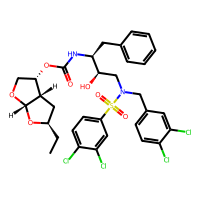
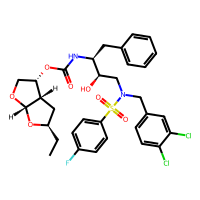
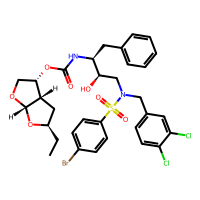
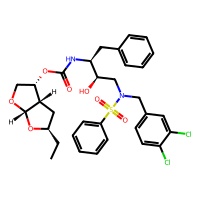
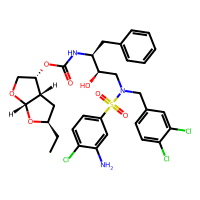

In [45]:
sdf2 = "/content/TEST_RDkitBabel.sdf"
df2 = PandasTools.LoadSDF(sdf2, embedProps=True, molColName=None, smilesName='SMILES')
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol='SMILES')
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None)
df2

In [46]:
#Visualize some chemical compounds
v = py3Dmol.view()
v.addModel(open('/content/TEST_RDkitBabel.sdf').read())
v.setStyle({'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol